### Introduction to Data Science - Assignment 3

Data Source : <a href='https://www.kaggle.com/dev0914sharma/customer-clustering'>Customer Clustering | Kaggle </a>

Code adapted from <a href='https://www.natasshaselvaraj.com/customer-segmentation-with-python/'>customer segmentation </a> and UAL DSAI lecture code


* [1 Loading Data](#1)
* [2 Standardise](#2)
* [3 Find appropriate K mean through Elbow Plot](#3)
* [4 Cluster and Plot'](#4)
* [5 Reduce Dimensions & Cluster Again](#5)
* [6 Examine Clusters](#6)
* [7 Interpretation to the Clusters](#7)

### Motivation

To perform a nice clustering result, I looked up on Kaggle to search for a dataset that has already proven to work. 

In [7]:
import random, os, sys, shutil
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 1 Loading Data  <a class="anchor" id="1"></a>

In [8]:
#Read in csv
df = pd.read_csv("segmentation data.csv")

In [9]:
#See columns
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [10]:
#Summarise
df.describe()

ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000         0.000000  
50%    115548.500000     1.000000         1.000000  
75%    138072.250000     1.000000         1.000000  
max    309364.000000     2.000000         2.000000

In [11]:
df.isna().any()

ID                 False
Sex                False
Marital status     False
Age                False
Education          False
Income             False
Occupation         False
Settlement size    False
dtype: bool

In [12]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### 2 Standardise  <a class="anchor" id="2"></a>

In [23]:
x = df
x.head()
x['Income'] = (x['Income']).astype(float)
x

ID  Sex  Marital status  Age  Education    Income  Occupation  \
0     100000001    0               0   67          2  124670.0           1   
1     100000002    1               1   22          1  150773.0           1   
2     100000003    0               0   49          1   89210.0           0   
3     100000004    0               0   45          1  171565.0           1   
4     100000005    0               0   53          1  149031.0           1   
...         ...  ...             ...  ...        ...       ...         ...   
1995  100001996    1               0   47          1  123525.0           0   
1996  100001997    1               1   27          1  117744.0           1   
1997  100001998    0               0   31          0   86400.0           0   
1998  100001999    1               1   24          1   97968.0           0   
1999  100002000    0               0   25          0   68416.0           0   

      Settlement size  
0                   2  
1                   2  
2                   0  
3                   1  
4                   1  
...               ...  
1995                0  
1996                0  
1997                0  
1998                0  
1999                0  

[2000 rows x 8 columns]

In [24]:
#Standardise
x = StandardScaler().fit_transform(x)

In [1]:
#Plot in 2D shows clear groups
plt.figure(figsize=(4, 4))
a = plt.plot(x[:,0],x[:,1],"rx")

NameError: name 'plt' is not defined

In [28]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(X)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=labels, alpha=0.3)
    plot_centroids(clusterer.cluster_centers_)

### 3 Find Appropriate K mean through Elbow Plot  <a class="anchor" id="3"></a>

/Users/chenxifang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


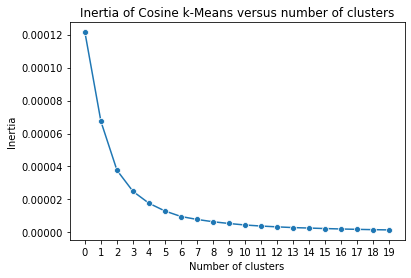

In [29]:
from sklearn import preprocessing
from matplotlib.ticker import FixedLocator, MaxNLocator

normalized_vectors = preprocessing.normalize(df)

scores = [KMeans(n_clusters=i+2).fit(normalized_vectors).inertia_  
          for i in range(20)]

g = sns.lineplot(np.arange(0, 20), scores, marker='o')
g.set_xticks(range(0,20))
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")

plt.savefig("intertia_cosine_kmeans.jpg", dpi=300)

### 4 Cluster and Plot  <a class="anchor" id="4"></a>


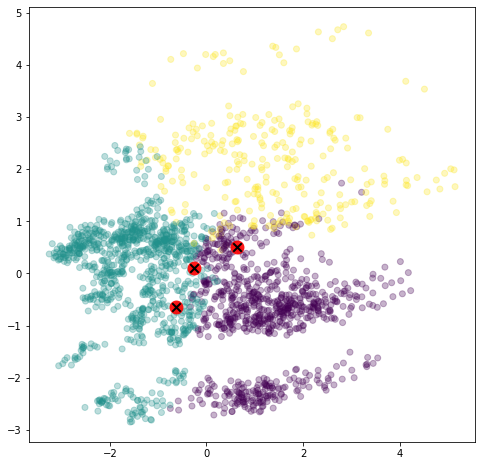

In [54]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x)

### 5 Reducing Dimensions before clustering  <a class="anchor" id="5"></a>

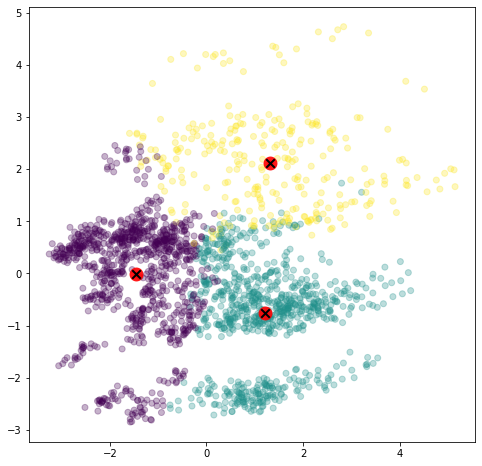

In [55]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 4

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results on 2D plot
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)

### 6 Examine Clusters  <a class="anchor" id="6"></a>

In [56]:
from sklearn.metrics import silhouette_score
print(silhouette_score(x, kmeans.labels_, metric='euclidean'))

0.24411261941568838


In [57]:
print(silhouette_score(x_less_dimensions, kmeans.labels_, metric='euclidean'))

0.29713032575860265


In [64]:
PCA_components = pd.DataFrame(x_less_dimensions)
pred = kmeans.predict(PCA_components.iloc[:,:4])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

ID  Sex  Marital status  Age  Education    Income  Occupation  \
0  100000001    0               0   67          2  124670.0           1   
1  100000002    1               1   22          1  150773.0           1   
2  100000003    0               0   49          1   89210.0           0   
3  100000004    0               0   45          1  171565.0           1   
4  100000005    0               0   53          1  149031.0           1   

   Settlement size  cluster  
0                2        2  
1                2        1  
2                0        1  
3                1        1  
4                1        1

In [59]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
avg_df

cluster            ID       Sex  Marital status        Age  Education  \
0        0  1.000014e+08  0.714754        0.605464  31.029508   0.923497   
1        1  1.000006e+08  0.141960        0.300251  34.442211   0.775126   
2        2  1.000008e+08  0.508651        0.692042  55.397924   2.124567   

          Income  Occupation  Settlement size  
0   97185.775956    0.430601         0.153005  
1  137101.373116    1.172111         1.317839  
2  151734.117647    1.017301         1.000000

<AxesSubplot:xlabel='cluster', ylabel='Age'>

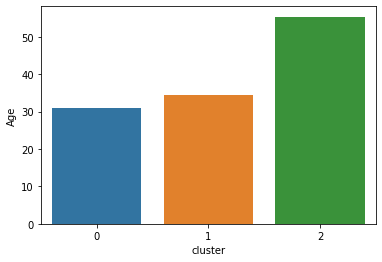

In [60]:
sns.barplot(x='cluster',y='Age',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Education'>

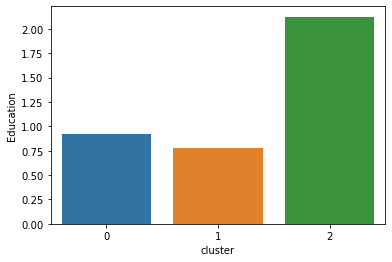

In [61]:
sns.barplot(x='cluster',y='Education',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Income'>

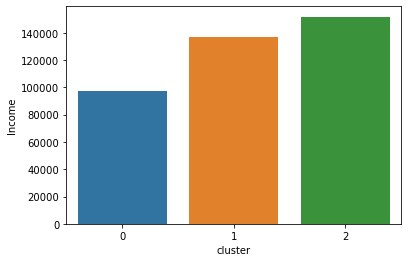

In [62]:
sns.barplot(x='cluster',y='Income',data=avg_df)

In [63]:
df2 = pd.DataFrame(frame.groupby(['cluster','Sex'])['Sex'].count())
df2

Sex
cluster Sex     
0       0    261
        1    654
1       0    683
        1    113
2       0    142
        1    147

### 7 Interpretaion to the Clusters  <a class="anchor" id="7"></a>
#### Cluster 1: 
Mostly young women below 30s, unknown education status, has the lowest income amongst three clusters. 
##### Cluster 2
Mostly men in their 30s, unknown education status, has better income than cluster one. 
##### Cluster 3
The gender distribution is quite equal, average age around 55, has the highest income and education status.

If compare Cluster one and two, although receiving similar level of education, cluster one is receiving a lot less income than cluster two. Reasons could be due to the location or gender, as cluster one contains mostly women who settle in small cities. 